In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [443]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [444]:
from keras.models import Sequential
from keras.layers import Dense

In [445]:
data = pd.read_csv('/content/mobile_price_classification.csv')

In [446]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [447]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [448]:
#no null values

In [449]:
data.dtypes

battery_power       int64
bluetooth           int64
clock_speed       float64
dual_sim            int64
front_cam           int64
4G                  int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
primary_camera      int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range         int64
dtype: object

In [450]:
#no need to encode

In [451]:
#no need for fixing outlier in this mobile specs data

In [452]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [453]:
#assigning data to x and y

In [454]:
x = data.drop('price_range',axis = 1)

In [455]:
x.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [456]:
'''creating 4 columns for four output labels in target y(by one hot encoding),
      so that there is  no  shape mismatch while using softmax function'''

'creating 4 columns for four output labels in target y(by one hot encoding),\n      so that there is  no  shape mismatch while using softmax function'

In [457]:
y = pd.get_dummies(data['price_range'])

In [458]:
y

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


In [459]:
y.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [460]:
#scaling

In [461]:
sc = StandardScaler()

In [462]:
x.loc[:,:] = sc.fit_transform(x)

In [463]:
x.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [464]:
#splitting training data and testing data

In [465]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [466]:
#creating an Artificial Neural Network

In [467]:
model = Sequential()

In [468]:
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [469]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [470]:
history = model.fit(x_train,y_train, epochs = 75, validation_split=0.2)

Epoch 1/75
40/40 [==============================] - 2s 7ms/step - loss: 1.3565 - accuracy: 0.3141 - val_loss: 1.3263 - val_accuracy: 0.3094
Epoch 2/75
40/40 [==============================] - 0s 3ms/step - loss: 1.2626 - accuracy: 0.3812 - val_loss: 1.2611 - val_accuracy: 0.3750
Epoch 3/75
40/40 [==============================] - 0s 3ms/step - loss: 1.1888 - accuracy: 0.4508 - val_loss: 1.1957 - val_accuracy: 0.4625
Epoch 4/75
40/40 [==============================] - 0s 3ms/step - loss: 1.1176 - accuracy: 0.5055 - val_loss: 1.1232 - val_accuracy: 0.5156
Epoch 5/75
40/40 [==============================] - 0s 3ms/step - loss: 1.0397 - accuracy: 0.5555 - val_loss: 1.0434 - val_accuracy: 0.5562
Epoch 6/75
40/40 [==============================] - 0s 3ms/step - loss: 0.9611 - accuracy: 0.5945 - val_loss: 0.9617 - val_accuracy: 0.6000
Epoch 7/75
40/40 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.6336 - val_loss: 0.8878 - val_accuracy: 0.6375
Epoch 8/75
40/40 [==

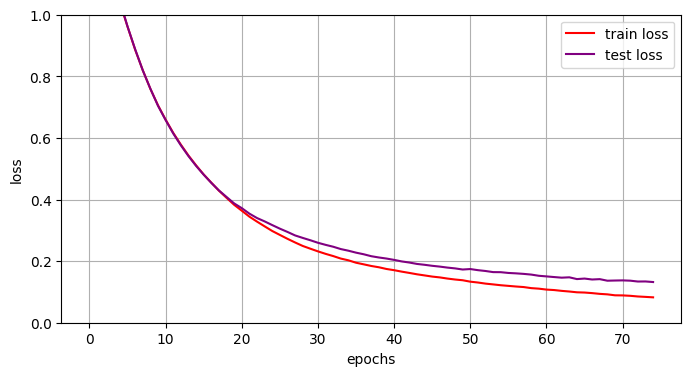

In [471]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],c = 'r')
plt.plot(history.history['val_loss'],c ='purple')
plt.ylim(0,1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train loss','test loss'])
plt.grid()
plt.show()

In [472]:
y_pred = model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [473]:
predictions  =  pd.DataFrame(y_pred,columns=[0,1,2,3])

In [474]:
predictions

,0,1,2,3
0,9.969729e-01,3.027115e-03,1.214052e-11,1.491272e-29
1,4.954433e-15,6.675245e-03,9.933219e-01,2.905871e-06
2,4.926895e-04,9.994958e-01,1.145126e-05,4.510899e-21
3,0.000000e+00,5.825494e-17,1.032366e-04,9.998967e-01
4,4.163373e-06,9.624044e-01,3.759155e-02,5.236562e-10
...,...,...,...,...
395,0.000000e+00,3.910983e-16,1.365992e-04,9.998634e-01
396,5.675242e-10,1.577506e-01,8.422468e-01,2.617441e-06
397,6.824546e-06,9.698920e-01,3.010129e-02,2.024622e-09
398,3.008897e-04,9.985409e-01,1.158038e-03,1.326593e-13


In [475]:
predic_list = []

In [476]:
for i in predictions.index:
  high_prob_cls_value = max(predictions.iloc[i,:])
  predic_list.append(predictions.iloc[i,:] == high_prob_cls_value)


In [477]:
y_pred_df = pd.DataFrame(predic_list,columns=[0,1,2,3])

In [478]:
y_pred_df

,0,1,2,3
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True
4,False,True,False,False
...,...,...,...,...
395,False,False,False,True
396,False,False,True,False
397,False,True,False,False
398,False,True,False,False


In [479]:
y_pred_df = y_pred_df.replace(True,1)

In [480]:
y_pred_df = y_pred_df.replace(False,0)

In [481]:
y_pred_df

,0,1,2,3
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
395,0,0,0,1
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0


In [482]:
accuracy_score(y_pred_df,y_test)

0.9425

In [483]:
y_test

,0,1,2,3
1860,1,0,0,0
353,0,0,1,0
1333,0,1,0,0
905,0,0,0,1
1289,0,1,0,0
...,...,...,...,...
965,0,0,0,1
1284,0,0,1,0
1739,0,1,0,0
261,0,1,0,0


In [484]:
print('accuracy of the model = ',accuracy_score(y_pred_df,y_test))

accuracy of the model =  0.9425
